## Анализ данных с использованием библиотеки Pandas

#### Анализ данных пассажиров "Титаника"

In [1]:
# Загружаем все необходимые библиотеки
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
# Считываем данные из файла
data = pd.read_csv('..//titanic_train.csv',
                  index_col='PassengerId')

In [3]:
# Выводим первые 5 строк
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Смотрим статистические показатели данных
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [5]:
data[(data['Embarked'] == 'C') & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Сортируем этих людей по убыванию платы за билет.**

In [6]:
data[(data['Embarked'] == 'C') & 
     (data['Fare'] > 200)].sort_values(by='Fare',
                               ascending=False).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


In [7]:
# Создаем признак
def age_category(age):
    '''
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    '''
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [8]:
age_categories = [age_category(age) for age in data.Age]

In [9]:
data['Age_category'] = age_categories

**Второй способ – через `apply`**

In [10]:
data['Age_category'] = data['Age'].apply(age_category)

**Смотрим информацию о данных**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           714 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      889 non-null    object 
 11  Age_category  891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [15]:
# Удаляем столбец Cabin, т.к.не заполнено более 50% данных в этом столбце
data=data.drop('Cabin', axis=1).dropna()

In [16]:
# Смотрим как изменились наши данные
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      712 non-null    int64  
 1   Pclass        712 non-null    int64  
 2   Name          712 non-null    object 
 3   Sex           712 non-null    object 
 4   Age           712 non-null    float64
 5   SibSp         712 non-null    int64  
 6   Parch         712 non-null    int64  
 7   Ticket        712 non-null    object 
 8   Fare          712 non-null    float64
 9   Embarked      712 non-null    object 
 10  Age_category  712 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [12]:
print("На борту было {} мужчин и {} женщин.".format(sum(data['Sex'] == 'male'), 
                                            sum(data['Sex'] == 'female')))

На борту было 577 мужчин и 314 женщин.


**Ниже приведу все варианты компановки:**

In [13]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
data.groupby('Sex').count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_category
Sex,,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312,314
male,577,577,577,453,577,577,577,577,107,577,577


In [15]:
print('Размер данных по мужчинам', data[(data['Sex'] == 'male')].shape)

Размер данных по мужчинам (577, 12)


In [16]:
print('Размер данных по женщинам',data[(data['Sex'] == 'female')].shape)

Размер данных по женщинам (314, 12)


In [17]:
sex= data.groupby(['Sex'])
sex.size()

Sex
female    314
male      577
dtype: int64

In [18]:
print(data.groupby('Sex')['Name'].agg(len))

Sex
female    314
male      577
Name: Name, dtype: int64


In [19]:
def sex_category(sex):
  if sex == "male":
    return 1
  else:
    return 0
data_sex_category = [sex_category(sex) for sex in data.Sex]
print(f"На борту находилось: \
\n{data_sex_category.count(1)} мужчин \
\n{data_sex_category.count(0)} женщин.")

На борту находилось: 
577 мужчин 
314 женщин.


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [20]:
data[data['Sex'] == 'male']['Pclass'].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

In [21]:
pd.crosstab(data['Pclass'], data['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,94,122,216
2,76,108,184
3,144,347,491
All,314,577,891


In [22]:
data[(data['Pclass'] == 2) & (data['Sex'] == 'male')].value_counts(['Pclass','Sex'])

Pclass  Sex 
2       male    108
dtype: int64

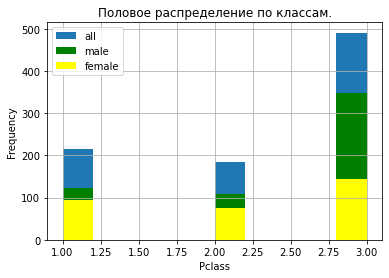

In [23]:
data['Pclass'].hist(label='all')
data[data['Sex'] == 'male']['Pclass'].hist(color="green", 
                                           label='male')
data[data['Sex'] == 'female']['Pclass'].hist(color="yellow", 
                                             label='female')
plt.title('Половое распределение по классам.')
plt.xlabel('Pclass')
plt.ylabel('Frequency')
plt.legend(loc='upper left')

In [24]:
print('Ответ: %d мужчин (2 класс)'\
%data[(data['Sex']=='male')&(data.Pclass==2)].shape[0])

Ответ: 108 мужчин (2 класс)


In [25]:
groups = data.groupby;
print('По классам: {}'.format(*[groups('Pclass')['Name'].agg(len)]))
print('По классам (женщины): {}'.format(*[data[data['Sex']=='female'].groupby('Pclass')['Name'].agg(len)]))
print('По классам (мужчины): {}'.format(*[data[data['Sex']=='male'].groupby('Pclass')['Name'].agg(len)]))

По классам: Pclass
1    216
2    184
3    491
Name: Name, dtype: int64
По классам (женщины): Pclass
1     94
2     76
3    144
Name: Name, dtype: int64
По классам (мужчины): Pclass
1    122
2    108
3    347
Name: Name, dtype: int64


In [26]:
data[data['Pclass'] == 2]['Sex'].value_counts()

male      108
female     76
Name: Sex, dtype: int64

In [27]:
print(data.groupby(['Sex','Pclass'])['Pclass'].count())

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Pclass, dtype: int64


In [28]:
Class_group = pd.crosstab(data.Pclass, data.Sex, margins = True)# Ваш код здесь
print(Class_group)
print(f' {Class_group.loc[2,"male"]} мужчин было во 2-м классе.')

Sex     female  male  All
Pclass                   
1           94   122  216
2           76   108  184
3          144   347  491
All        314   577  891
 108 мужчин было во 2-м классе.


**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [29]:
data_fare = data.sort_values(by = "Fare")
print(f"Медиана — {round(data_fare.Fare.median(),2)} \
\nСтандартное отклонение — {round(data_fare.Fare.std(),2)}.")

Медиана — 14.45 
Стандартное отклонение — 49.69.


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- **<font color='red'> 40.6% среди молодых и 19% среди старых, если не дроп 22 </font>
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [33]:
young = data[data['Age'] < 30]['Survived']
old = data[data['Age'] > 60]['Survived']

a = round(100 * young.mean(), 1)
b = round(100 * old.mean(), 1)

a,b

(40.6, 22.7)

In [35]:
def survived_stats(data,cond):
  return round(len(data[(data['Survived']==1)&(cond)])/len(data[cond])*100,1)

s1=survived_stats(data,data['Age']<30)
s2=survived_stats(data,data['Age']>60)
print('Ответ: {}% среди молодых и {}% среди старых'.format(s1,s2))

Ответ: 40.6% среди молодых и 22.7% среди старых


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [37]:
men_surv=data[data['Sex']=='male']['Survived'] 
fem_surv=data[data['Sex']=='female']['Survived']
print("Доли выживыших: \n\t среди женщин {}%, \n\t среди мужчин {}%".format(
round(100 * fem_surv.mean(), 1), round(100 * men_surv.mean(), 1)))

Доли выживыших: 
	 среди женщин 74.2%, 
	 среди мужчин 18.9%


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [38]:
first_names = data[data['Sex'] == 'male']['Name'].apply(lambda full_name: 
                full_name.split(',')[1].split()[1])
first_names.value_counts().head()


William    35
John       25
George     14
Charles    13
Thomas     13
Name: Name, dtype: int64

In [46]:
def get_name(x):
  return x.split()[2]

v=data[(data['Sex'] == 'male')&(data['Name'])]
data['Short_name'] = data['Name'].apply(get_name)
data['Short_name'].value_counts().idxmax()


'William'

In [47]:
name=data[data['Sex']=='male']['Name'].str.split(', ').str[1]
names=np.array([el.split()[1] for el in name.values])
unique_names=np.unique(names,return_counts=True)
print('Ответ: самое популярное имя '+\
'среди пассажиров Титаника мужского пола - '+\
unique_names[0][unique_names[1].argmax()])

Ответ: самое популярное имя среди пассажиров Титаника мужского пола - William


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

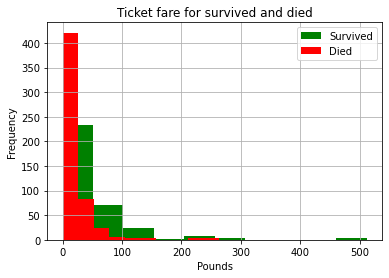

In [48]:
data[data['Survived'] == 1]['Fare'].hist(color="green", 
                                         label='Survived')
data[data['Survived'] == 0]['Fare'].hist(color="red", 
                                         label='Died')
plt.title('Ticket fare for survived and died')
plt.xlabel('Pounds')
plt.ylabel('Frequency')
plt.legend();

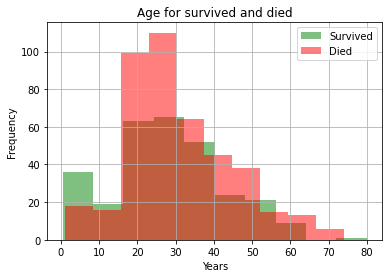

In [49]:
data[data['Survived'] == 1]['Age'].hist(color="green", 
                                         label='Survived', alpha=.5)
data[data['Survived'] == 0]['Age'].hist(color="red", 
                                         label='Died', alpha=.5)
plt.title('Age for survived and died')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.legend();

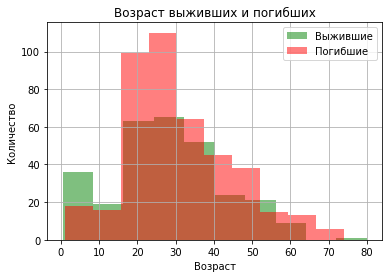

In [50]:
data[data['Survived'] == 1]['Age'].hist(color="green",label='Выжившие', alpha=.5)
data[data['Survived'] == 0]['Age'].hist(color="red",label='Погибшие', alpha=.5)
plt.title('Возраст выживших и погибших')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.legend();

In [51]:
import seaborn as sns

C:\Users\mar-p\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

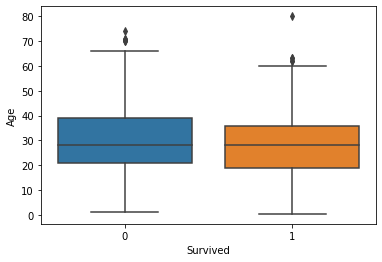

In [52]:
sns.boxplot(data['Survived'], data['Age'])

In [55]:
data.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

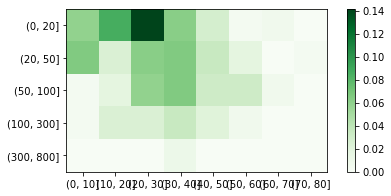

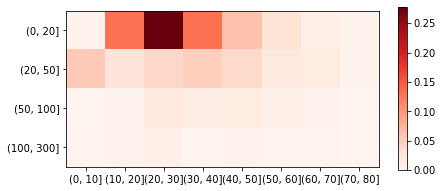

In [56]:
data_copy = data[['Survived','Fare','Age']].copy()
age_r = np.array([i for i in range(0,90,10)])
fare_r = np.array([0,20,50,100,300,800])
age_r
fare_r
data_copy['R_Age'] = pd.cut(data_copy['Age'],age_r)
data_copy['R_Fare'] = pd.cut(data_copy['Fare'],fare_r)
data_copy['R_Surv'] = 1
#data_copy['Survived'].apply(lambda x: x if x == 1 else -1)
data_copy.dropna(inplace = True)

ds = data_copy[data_copy['Survived']==1]
dn = data_copy[data_copy['Survived']==0]
ct = pd.crosstab(index = ds['R_Fare'], columns = ds['R_Age'], values = ds['R_Surv'], aggfunc = sum, normalize = True).sort_values(['R_Fare']).fillna(0)

cn = pd.crosstab(index = dn['R_Fare'], columns = dn['R_Age'], values = dn['R_Surv'], aggfunc = sum, normalize = True).sort_values(['R_Fare']).fillna(0)

#fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(15, 7))

plt.figure(figsize=(7, 3))
plt.imshow(ct, cmap='Greens')
plt.colorbar() # добавим шкалу интенсивности цвета

plt.xticks(range(len(ct.columns)), ct.columns)
plt.yticks(range(len(ct)), ct.index);

plt.show()

plt.figure(figsize=(7, 3))
plt.imshow(cn, cmap='Reds')
plt.colorbar() # добавим шкалу интенсивности цвета

plt.xticks(range(len(cn.columns)), cn.columns)
plt.yticks(range(len(cn)), cn.index);


plt.show()

                Age       Fare
Погибшие  30.626179  22.117887
Выжившие  28.343690  48.395408


<ipython-input-57-aa606bcbc42b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  raspr1 = data.groupby('Survived')['Age','Fare'].mean()


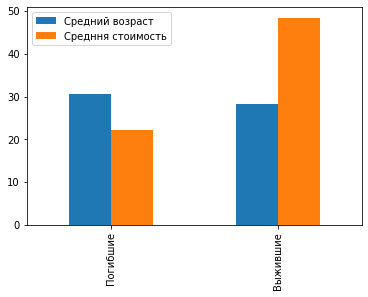

In [57]:
raspr1 = data.groupby('Survived')['Age','Fare'].mean()
raspr1.index = ['Погибшие','Выжившие']
print(raspr1)
raspr1.plot.bar()
plt.legend(labels = ['Средний возраст','Средння стоимость'])

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

In [58]:
for cl in data['Pclass'].unique():
    for sex in data['Sex'].unique():
        print("Average age for {0} and class {1}: {2}".format(sex, cl, 
            round(data[(data['Sex'] == sex)
                         & (data['Pclass'] == cl)]['Age'].mean(),2)))

Average age for male and class 3: 26.51
Average age for female and class 3: 21.75
Average age for male and class 1: 41.28
Average age for female and class 1: 34.61
Average age for male and class 2: 30.74
Average age for female and class 2: 28.72


In [59]:
pd.crosstab(data['Pclass'], data['Sex'], 
            values=data['Age'], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589
